In [1]:
# Import modules. 
import numpy as np
import pandas as pd
import tensorflow as tf

2023-01-11 20:08:39.448677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 20:08:42.979184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 20:08:42.979212: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-11 20:08:53.250890: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Open the file containing the dataset.
dataset = pd.read_csv("/home/andre/Desktop/projeto Renner/dataset.csv")

In [3]:
# Replace the periods by comma. 
dataset['IBC-Br'] = [float(str(i).replace(",", ".")) for i in dataset['IBC-Br']]
dataset['icom'] = [float(str(i).replace(",", ".")) for i in dataset['icom']]
dataset['dolar'] = dataset['dolar'].str.replace(',','.')
dataset['expectativa'] = dataset['expectativa'].str.replace(',','.')

In [4]:
# Return a tuple representing the dimensionality of the DataFrame.
dataset.shape

(132, 17)

In [5]:
# Prints information about the DataFrame.
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         132 non-null    object 
 1   trend        132 non-null    object 
 2   ipca         132 non-null    float64
 3   selic        132 non-null    float64
 4   IBC-Br       132 non-null    float64
 5   icom         132 non-null    float64
 6   expectativa  132 non-null    object 
 7   dolar        132 non-null    object 
 8   icon         132 non-null    float64
 9   ibov         132 non-null    int64  
 10  open         132 non-null    float64
 11  high         132 non-null    float64
 12  low          132 non-null    float64
 13  close        132 non-null    float64
 14  adjclose     132 non-null    float64
 15  volume       132 non-null    int64  
 16  ticker       132 non-null    object 
dtypes: float64(10), int64(2), object(5)
memory usage: 17.7+ KB


In [6]:
# Generate descriptive statistics from dataframe.
dataset.describe()

,ipca,selic,IBC-Br,icom,icon,ibov,open,high,low,close,adjclose,volume
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02
mean,0.494015,8.861671,139.508712,91.899242,3152.596364,72257.000000,23.220766,25.028803,21.541370,23.326701,21.289157,1.123960e+08
std,0.349057,3.652107,6.076853,12.156991,1090.243310,23045.457373,13.500074,14.484806,12.398052,13.420894,13.123618,5.040229e+07
min,-0.380000,2.000000,118.350000,61.200000,1498.440000,40406.000000,7.938352,8.736943,7.192235,7.936712,6.187788,1.766306e+07
25%,0.250000,6.500000,135.822500,85.525000,2391.112500,54221.000000,11.106888,12.222783,10.737519,11.214296,9.704381,8.081030e+07
50%,0.450000,8.705645,139.300000,94.050000,2854.810000,63791.500000,18.406941,19.533496,17.226274,18.763602,16.814088,9.810343e+07
75%,0.742500,11.801613,143.170000,102.150000,3812.875000,90616.000000,34.152985,36.457018,30.689229,33.970031,31.415106,1.264414e+08
max,1.350000,14.250000,152.130000,111.400000,5497.850000,126802.000000,56.995518,60.418224,55.725643,56.995518,53.631706,2.767085e+08


In [7]:
# Remove the columns do not needed.
new_data_set = dataset.drop(columns=['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], axis = 1)

In [8]:
# converting object type column to float.
dataset['dolar'] = dataset['dolar'].astype(float) 

In [9]:
# Show the first five registers from dataframe.
new_data_set.head()

,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov
0,Uptrend,0.83,10.943548,132.66,106.1,163.71,1.67411428571429,1525.61,66575
1,Uptrend,0.80,11.250000,136.18,111.4,166.17,1.66719,1533.05,67383
2,Uptrend,0.79,11.717742,144.93,105.3,162.43,1.6583,1629.59,68587
3,Uptrend,0.77,11.800000,139.89,108.5,163.01,1.58564736842105,1672.59,66133
4,Uptrend,0.47,12.000000,143.23,106.4,155.6,1.61269090909091,1636.41,64620


In [10]:
# Normalize labels. to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()  
y = labelencoder.fit_transform(new_data_set['trend'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Select the macroeconomic indicators.
previsores = new_data_set.drop(['trend'], axis = 1)
X = previsores.iloc[:,0:132].values
previsores

,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov
0,0.83,10.943548,132.66,106.1,163.71,1.67411428571429,1525.61,66575
1,0.80,11.250000,136.18,111.4,166.17,1.66719,1533.05,67383
2,0.79,11.717742,144.93,105.3,162.43,1.6583,1629.59,68587
3,0.77,11.800000,139.89,108.5,163.01,1.58564736842105,1672.59,66133
4,0.47,12.000000,143.23,106.4,155.6,1.61269090909091,1636.41,64620
...,...,...,...,...,...,...,...,...
127,0.87,5.120968,142.05,100.9,143.86,5.25112272727273,5007.44,118781
128,1.16,5.516667,138.96,94.1,148.22,5.27909047619048,4709.56,110979
129,1.25,6.443548,138.46,94.2,142.89,5.539375,4251.43,103501
130,0.95,7.750000,140.22,88.0,142.22,5.55626,3932.70,101915


In [12]:
# Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
# Extracting a value from predictors
d = X[0] 
d

array([0.69942197, 0.73008558, 0.42362345, 0.89442231, 0.89053295,
       0.02715036, 0.0067935 , 0.30289597])

In [14]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.shape, y_train

((99, 8),
 array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]))

In [15]:
# Show the matrix shape and the y data for test. 
X_test.shape, y_test

((33, 8),
 array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]))

In [16]:
# input_shape. It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.

In [17]:
# Network architecture
rede_neural = tf.keras.models.Sequential() # Sequential groups a linear stack of layers into a tf.keras.Model.
rede_neural.add(tf.keras.layers.Dense(units = 4, activation='relu', input_shape=(8,)))
rede_neural.add(tf.keras.layers.Dense(units = 4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

2023-01-11 20:09:16.985398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-11 20:09:16.985431: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-11 20:09:16.985457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andre-Aspire-E1-572): /proc/driver/nvidia/version does not exist
2023-01-11 20:09:17.003259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
rede_neural.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [20]:
# This builds the model for the first time
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.6915 - accuracy: 0.6061
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.6364
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.6364
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.6364
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.6364
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.6465
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6566
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6667
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6768
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6465
Epoch 11/200
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7576
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7172
Epoch 86/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7273
Epoch 87/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7576
Epoch 88/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.7071
Epoch 89/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 90/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7879
Epoch 91/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7475
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7273
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7172
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8182
Epoch 168/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8283
Epoch 169/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8182
Epoch 170/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8182
Epoch 171/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7879
Epoch 172/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7374
Epoch 173/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.7980
Epoch 174/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8283
Epoch 175/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3972 - accuracy: 0.8081
Epoch 176/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.7778
Epoch 177/200
4/4 [=====

In [21]:
y_pred = rede_neural.predict(X_test)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[0.76590896],
       [0.95006025],
       [0.9601191 ],
       [0.9024396 ],
       [0.64936495],
       [0.8575261 ],
       [0.8515617 ],
       [0.78852785],
       [0.8283708 ],
       [0.62062466],
       [0.84242886],
       [0.1300022 ],
       [0.5180168 ],
       [0.8075011 ],
       [0.7804109 ],
       [0.3458643 ],
       [0.64936495],
       [0.9720639 ],
       [0.01337599],
       [0.76386917],
       [0.84462214],
       [0.8001571 ],
       [0.41629407],
       [0.95251864],
       [0.9720639 ],
       [0.7087071 ],
       [0.64936495],
       [0.02640076],
       [0.89041626],
       [0.14631069],
       [0.52508634],
       [0.8405549 ],
       [0.01412575]], dtype=float32)

In [22]:
y_pred = (y_pred >= 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  5],
       [ 2, 21]])

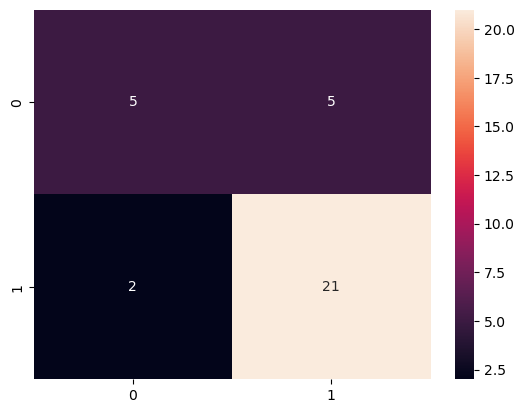

In [24]:
import seaborn as sns
sns.heatmap(cm, annot=True);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))
# F1 - score estava 0,83 e foi para 0,9 quando corrigi o valor da taxa selic.

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.81      0.91      0.86        23

    accuracy                           0.79        33
   macro avg       0.76      0.71      0.72        33
weighted avg       0.78      0.79      0.78        33



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy .: ", accuracy_score(y_test, y_pred))  # Accuracy classification score.

print("Precision : ", precision_score(y_test, y_pred))

print("Recall ...: ", recall_score(y_test, y_pred))

print("F1 Score .: ", f1_score(y_test, y_pred, average='macro'))

Accuracy .:  0.7878787878787878
Precision :  0.8076923076923077
Recall ...:  0.9130434782608695
F1 Score .:  0.7226890756302521


In [27]:
# salvando o modelo
# https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-predict-new-samples-with-your-keras-model.md

In [28]:
from tensorflow.keras.models import save_model

In [29]:
# Save the model
filepath = './saved_model'
save_model(rede_neural, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets
